<a id = 'Libraries'></a>
## Importing Libraries

In [54]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<a id = 'Data'></a>
## Get the Data

In [55]:
adult_df = pd.read_csv('adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)

adult_df.head()

Number of Observations in adult dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [56]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<a id = 'EDA'></a>
## Data Exploration and Visualization

In [58]:
#Separate categorical and numberical columns
cat_col = adult_df.dtypes[adult_df.dtypes == 'object']
num_col = adult_df.dtypes[adult_df.dtypes != 'object']

In [59]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')


--------------------Workclass-------------------------
                  total   percent
workclass                        
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
education                    
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Pres

In [60]:
edit_cols = ['native.country','occupation','workclass']
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [61]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [62]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_df['education'].value_counts()

<ipython-input-62-c5d1036020a3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)


,count
education,
HS-grad,13556
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
elementary_school,1147
Assoc-acdm,1067
Prof-school,576
Doctorate,413


In [63]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

<ipython-input-63-d98ba0958ebe>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)


,count
marital.status,
Married,15417
Never-married,10683
Separated,5468
Widowed,993


In [64]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()



<ipython-input-64-a7cbc5056bc3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)


,count
workclass,
Private,22696
Govt_employees,4351
Self_employed,3657
unknown,1836
Without-pay,14
Never-worked,7


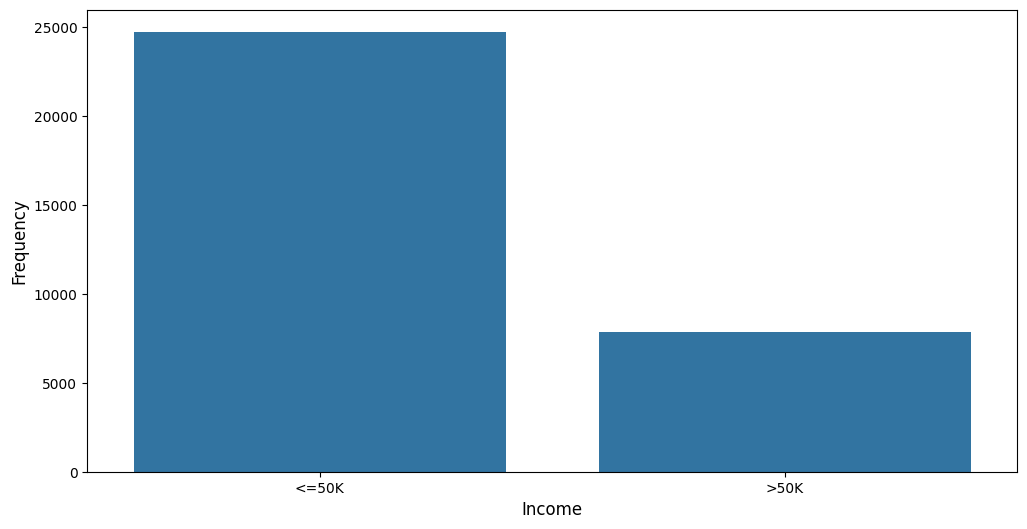

In [65]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

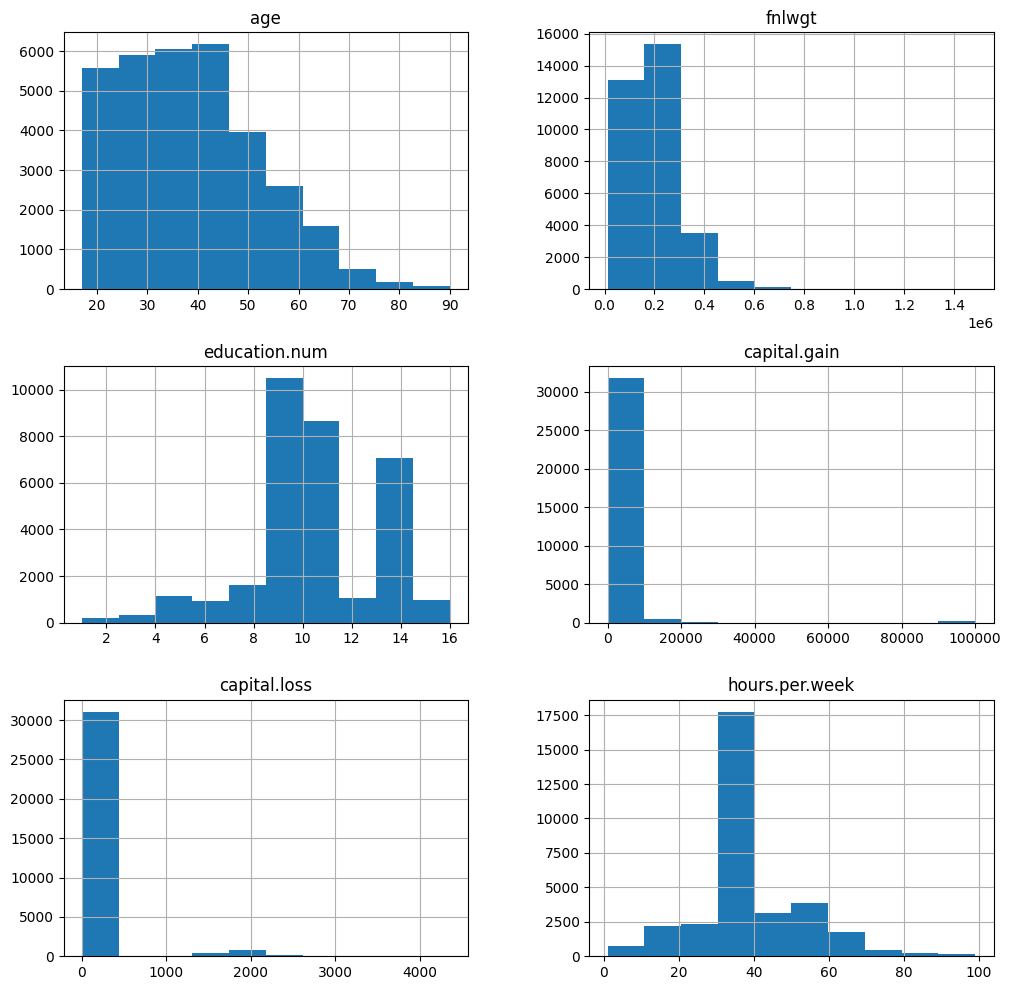

In [66]:
adult_df[list(num_col.index)].hist(figsize = (12,12));

In [67]:
capital_loss_df = adult_df[adult_df['capital.loss']>0]
capital_gain_df = adult_df[adult_df['capital.gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(adult_df.loc[adult_df['capital.gain'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(adult_df.loc[adult_df['capital.loss'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [68]:
capital_gain_0= adult_df[adult_df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = adult_df[adult_df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())


     capital.loss  capital.gain
411          1977             0
687          1902             0
633          1902             0
13           2824             0
388          1977             0
      capital.loss  capital.gain
1556             0         99999
2692             0          7298
2210             0         13550
1991             0         15024
4191             0           594


In [69]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)][col].value_counts())


Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
workclass
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: count, dtype: int64
================================education=================================
education
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: count, dtype: int64
================================marital.status=================================
marital.status
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: count, dtype: int64
================================occupation===============================

In [70]:
adult_df.loc[adult_df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [72]:
adult_df.loc[adult_df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [73]:
print(f"Number of observations having capital loss of 4356:{adult_df.loc[adult_df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_df.loc[adult_df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
income
>50K     658
<=50K    277
Name: count, dtype: int64


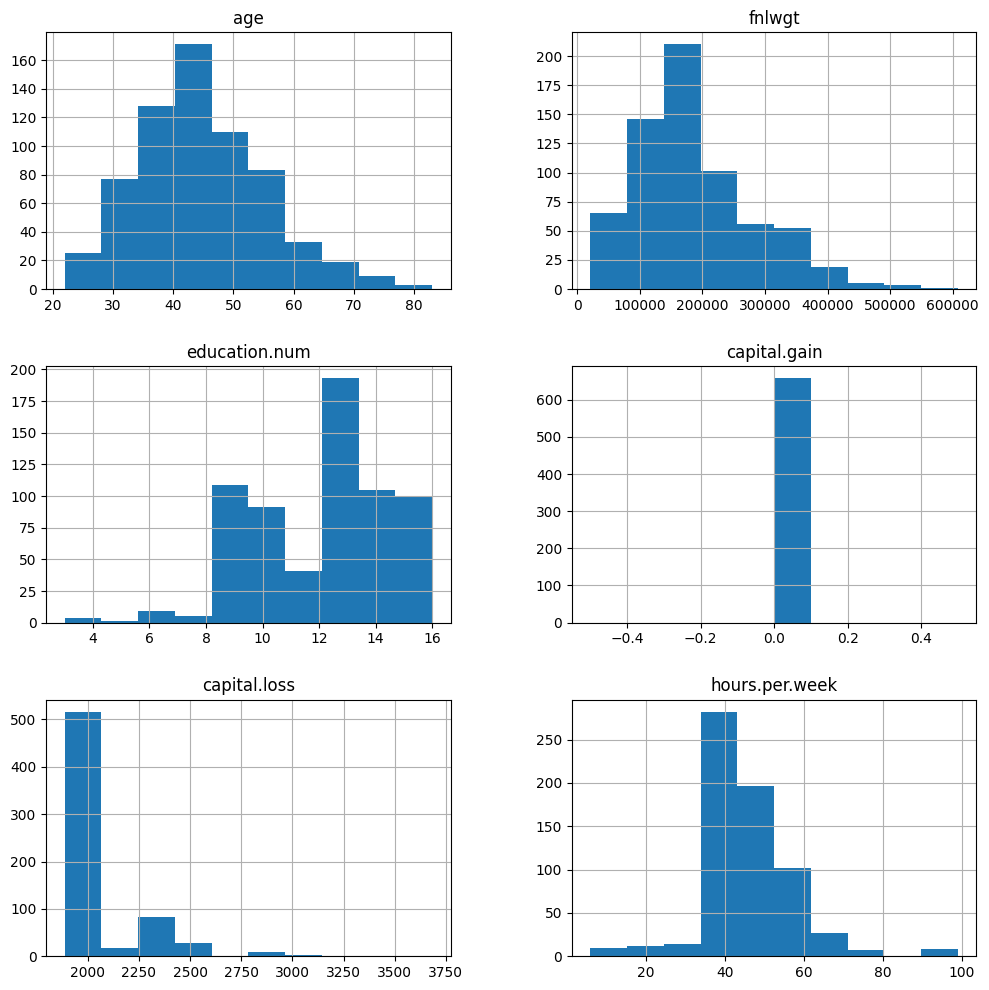

In [74]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
adult_df[(adult_df['capital.loss'] >= 1871) & (adult_df['income'] == '>50K')].hist(figsize = (12,12));

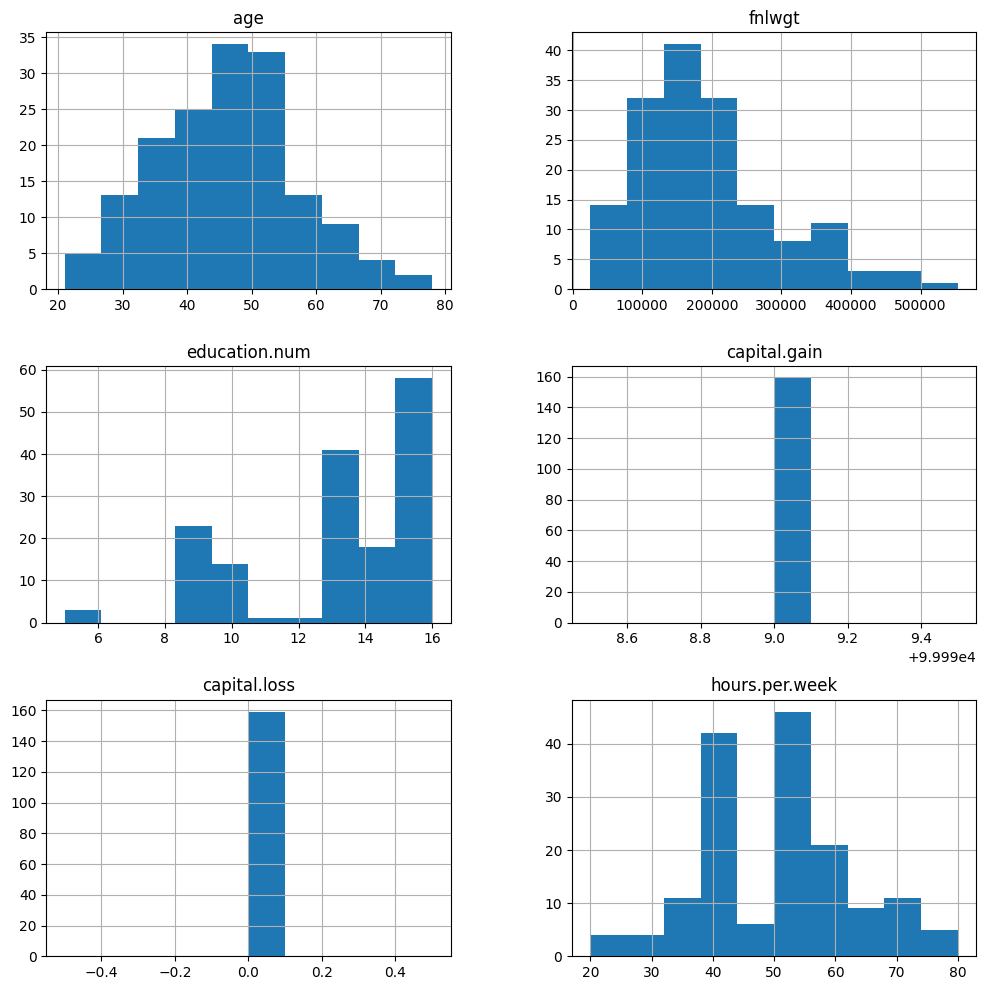

In [75]:
adult_df.loc[adult_df['capital.gain'] == 99999,:].hist(figsize = (12,12));

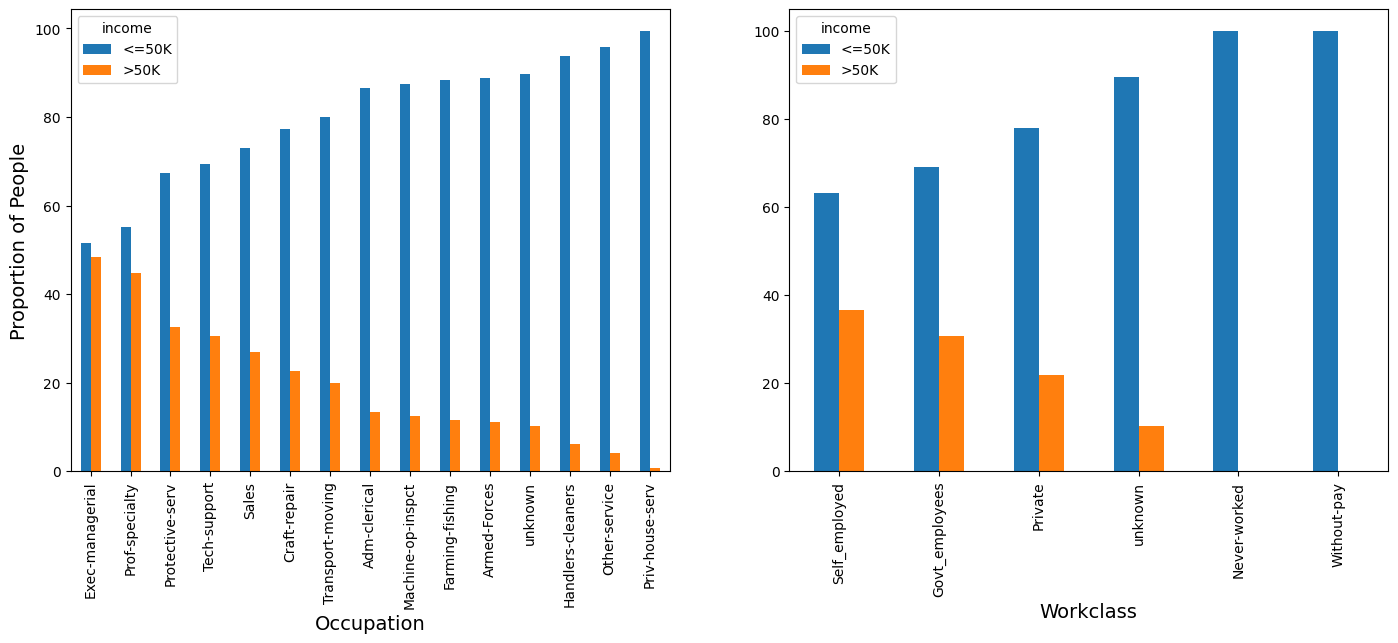

In [76]:
table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);




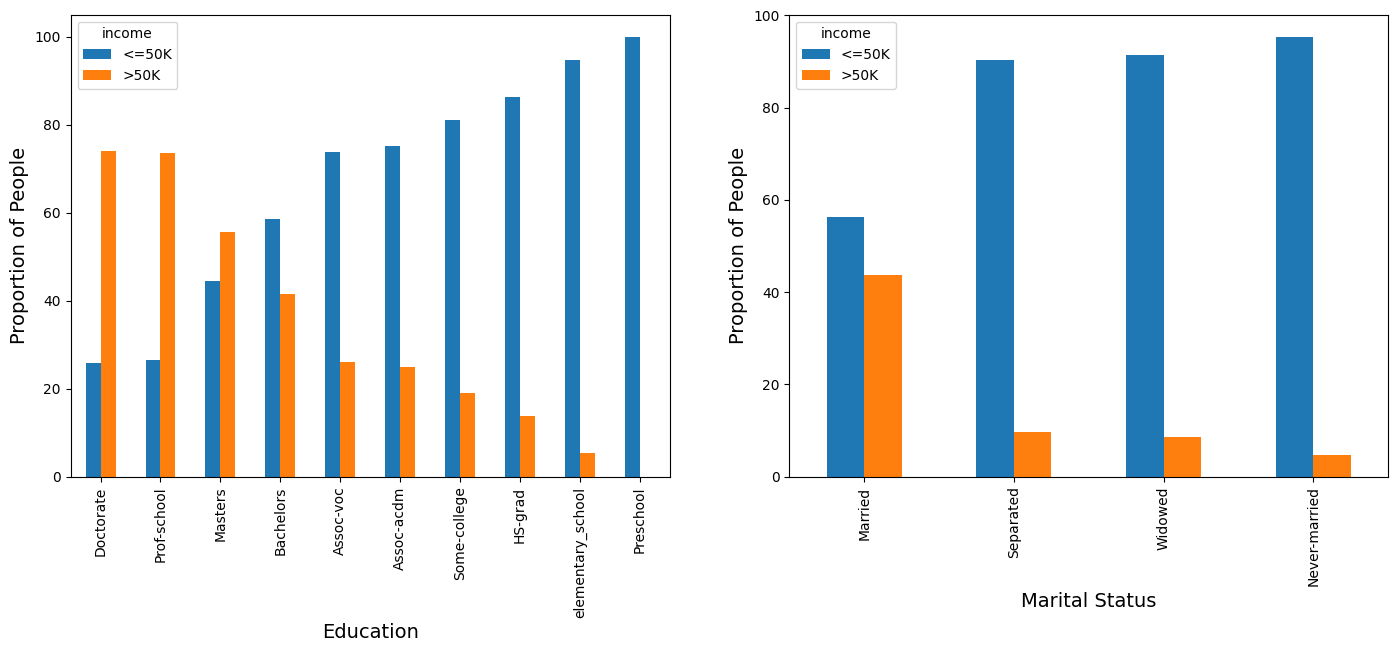

In [77]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


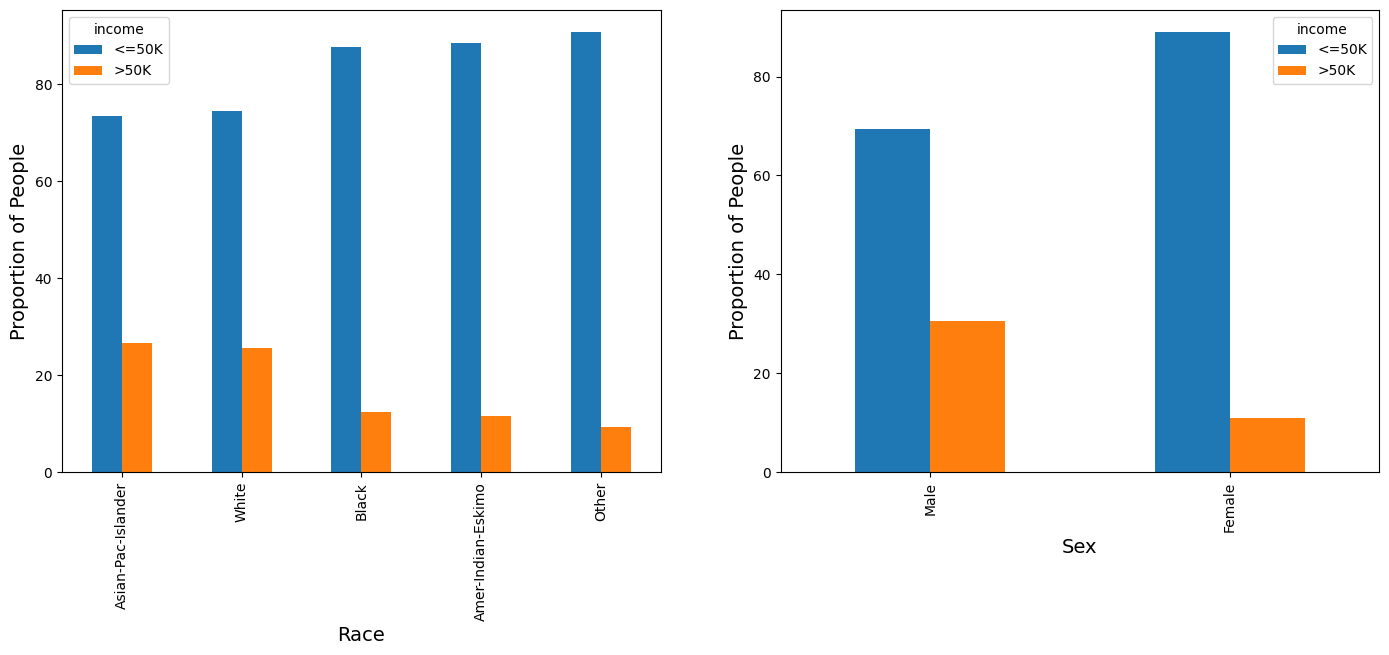

In [78]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

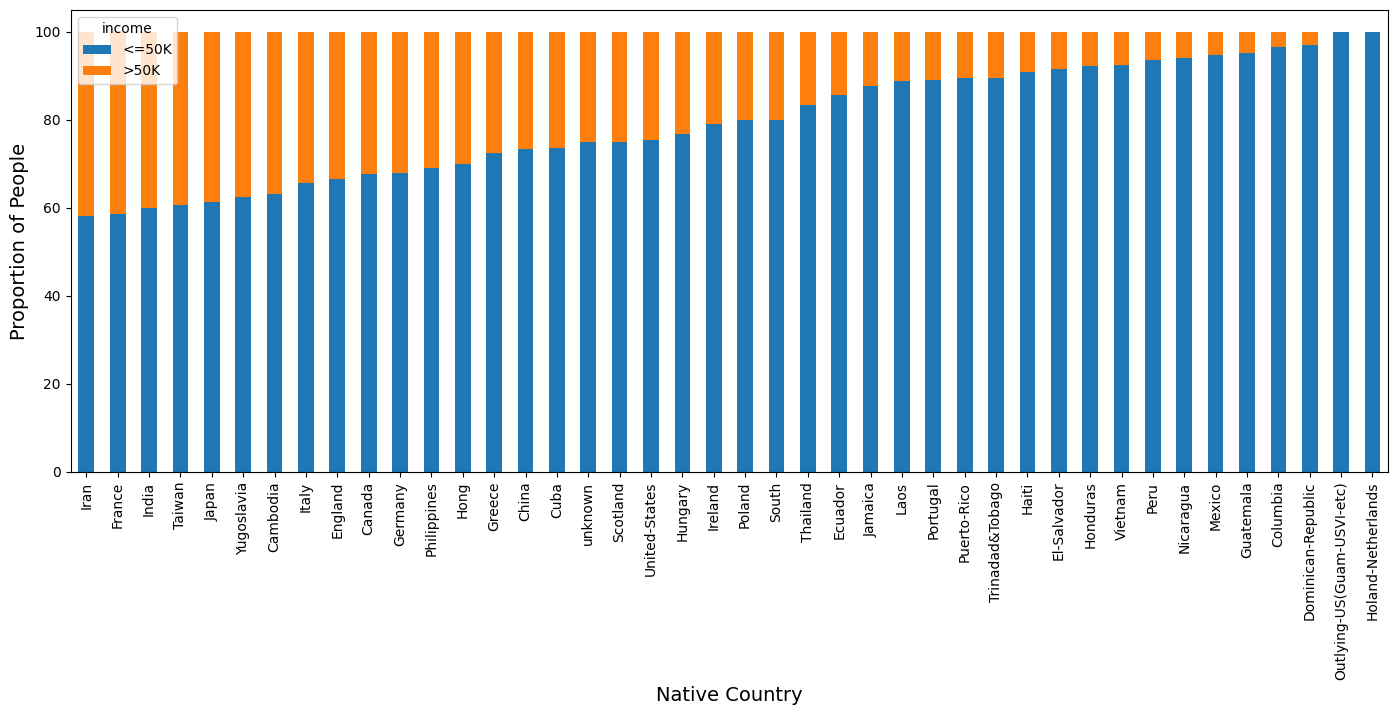

In [79]:
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

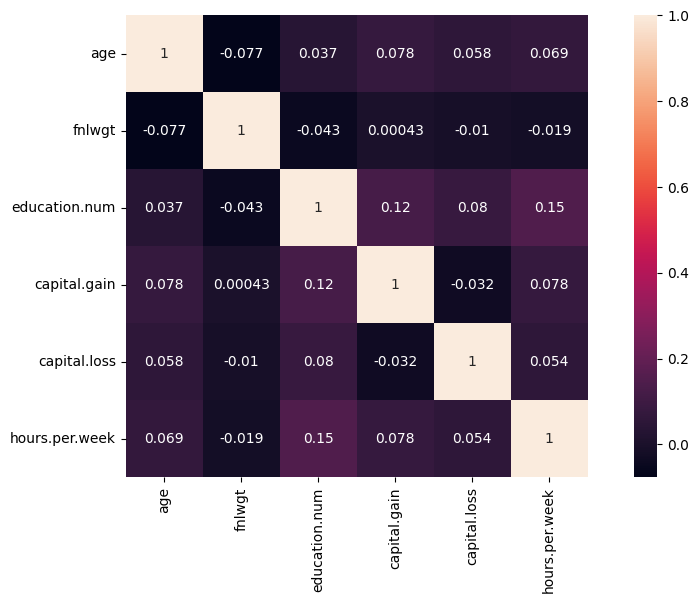

In [80]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult_df[list(num_col.index)].corr(),annot = True,square = True);

strong correlation.

- Age and Hours per week
- capital gain and hours per week

Moderate Correlation

- capital loss and age

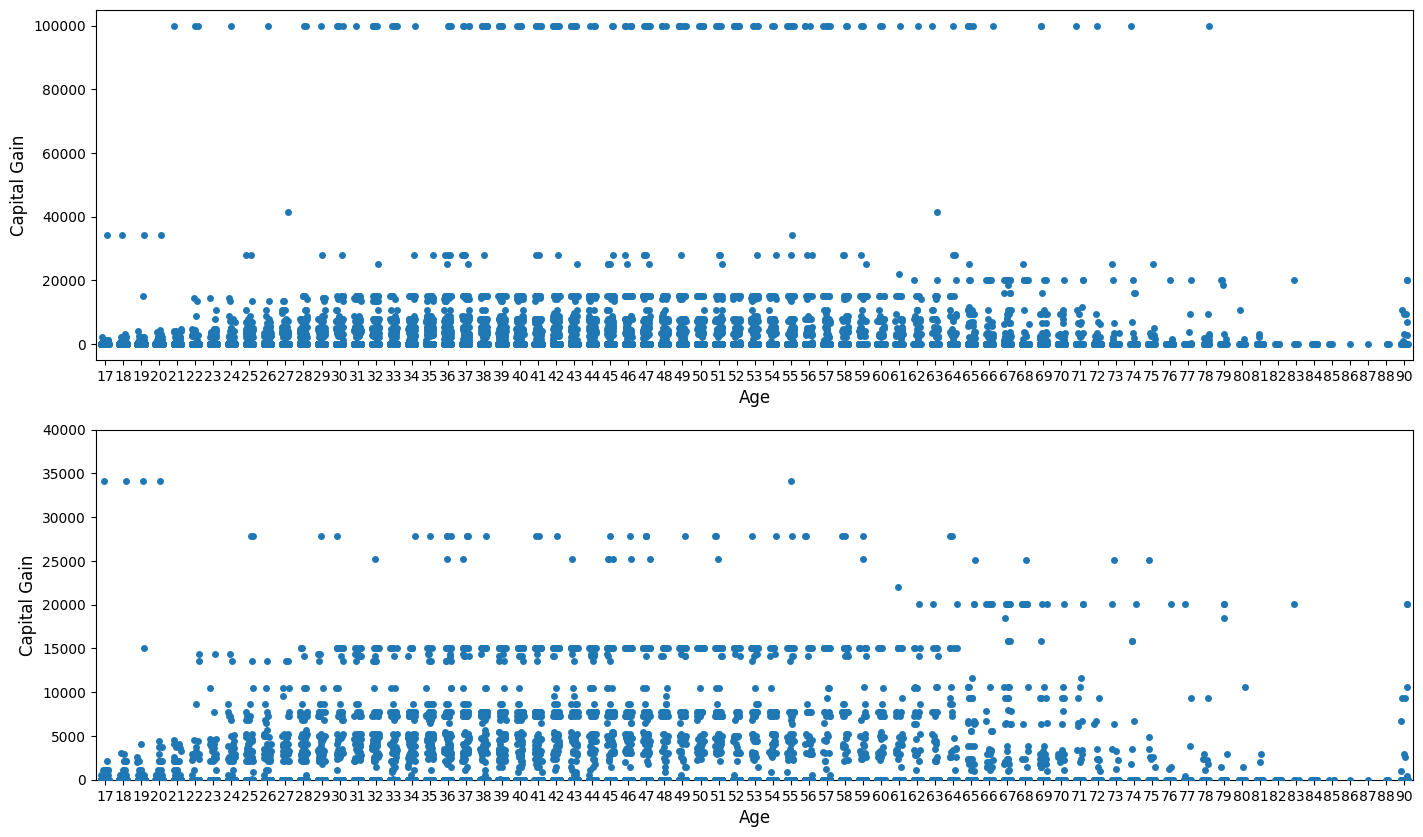

In [81]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot(x='age', y='capital.gain', data=adult_df, jitter=0.2, ax=ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot(x='age', y='capital.gain', data = adult_df,jitter = 0.2,ax=ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

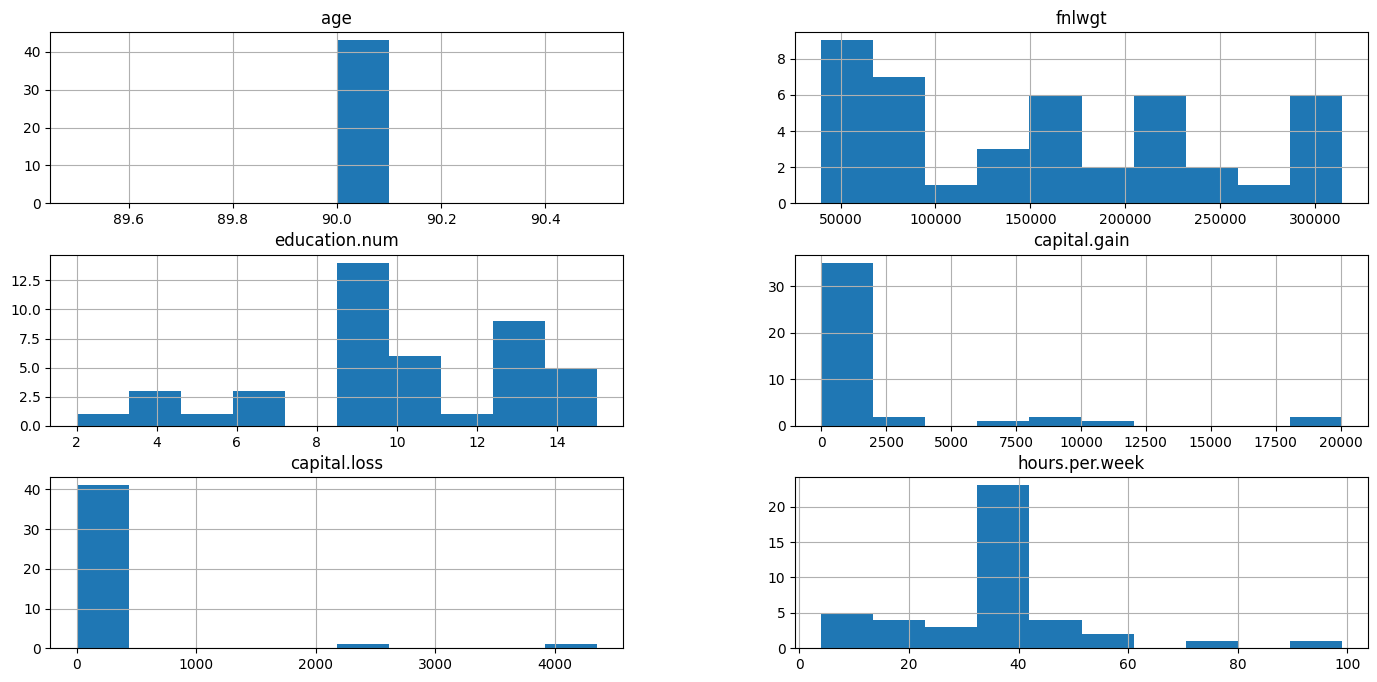

In [82]:
adult_df[adult_df['age'] == 90].hist(figsize = (17,8));

In [83]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue


=======================================workclass=========================
workclass
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: count, dtype: int64
=======================================occupation=========================
occupation
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Sales                3
Craft-repair         3
Machine-op-inspct    3
Protective-serv      1
Handlers-cleaners    1
Farming-fishing      1
Transport-moving     1
Name: count, dtype: int64
=======================================income=========================
income
<=50K    35
>50K      8
Name: count, dtype: int64


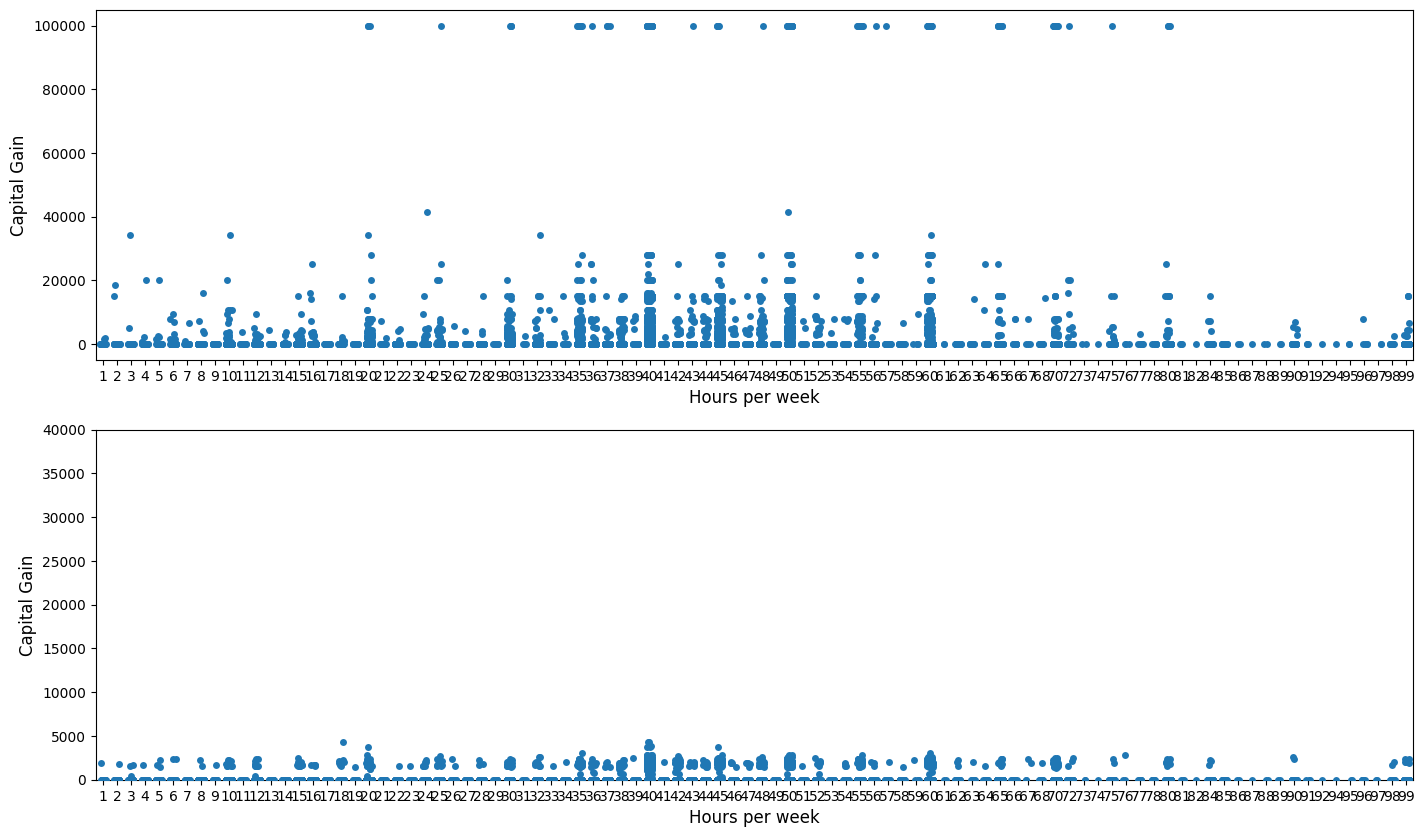

In [84]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot(x='hours.per.week', y='capital.gain', data = adult_df,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot(x='hours.per.week', y='capital.loss', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

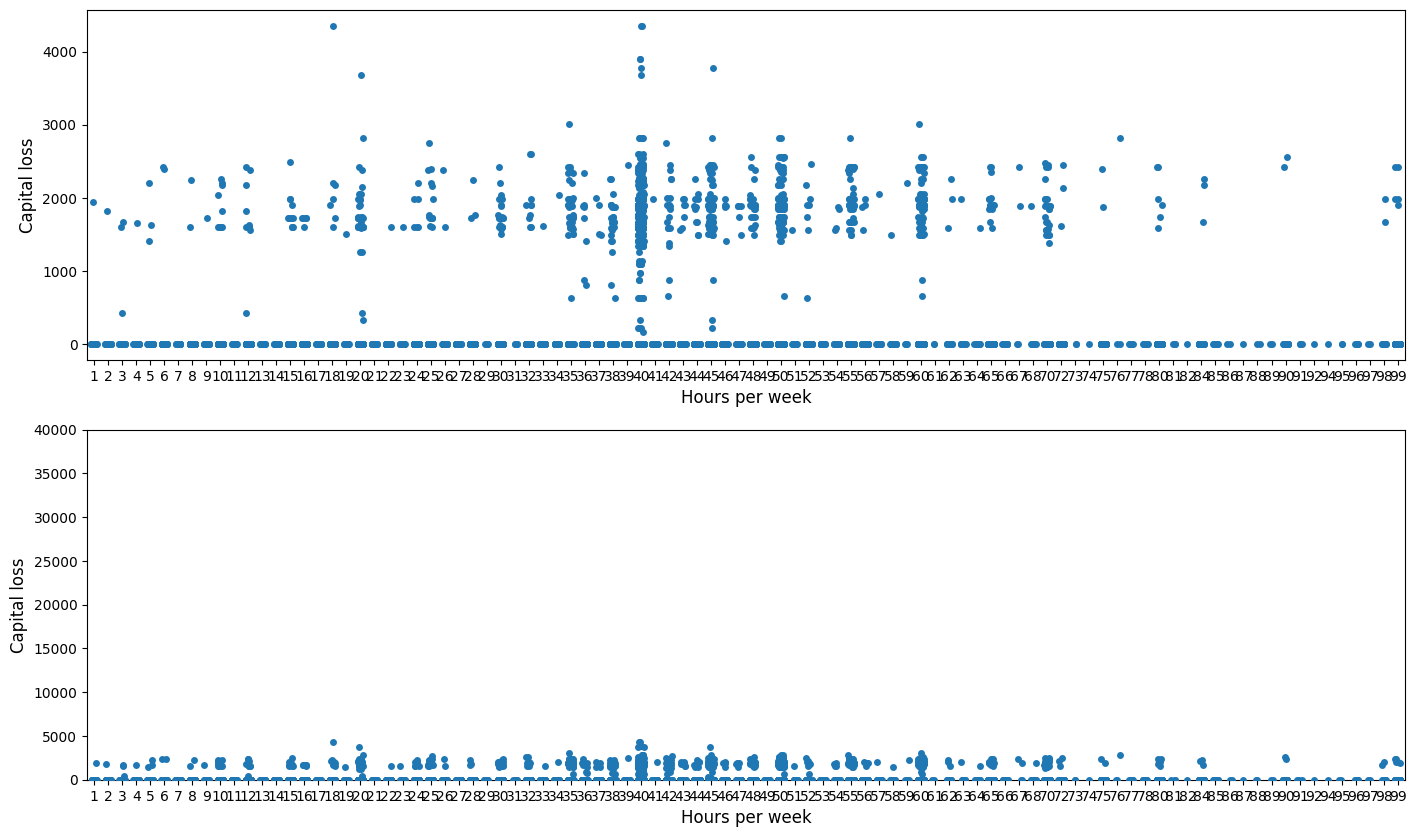

In [85]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot(x='hours.per.week', y='capital.loss', data = adult_df,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital loss',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot(x='hours.per.week', y='capital.loss', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital loss',fontsize = 12);
plt.ylim(0,40000);

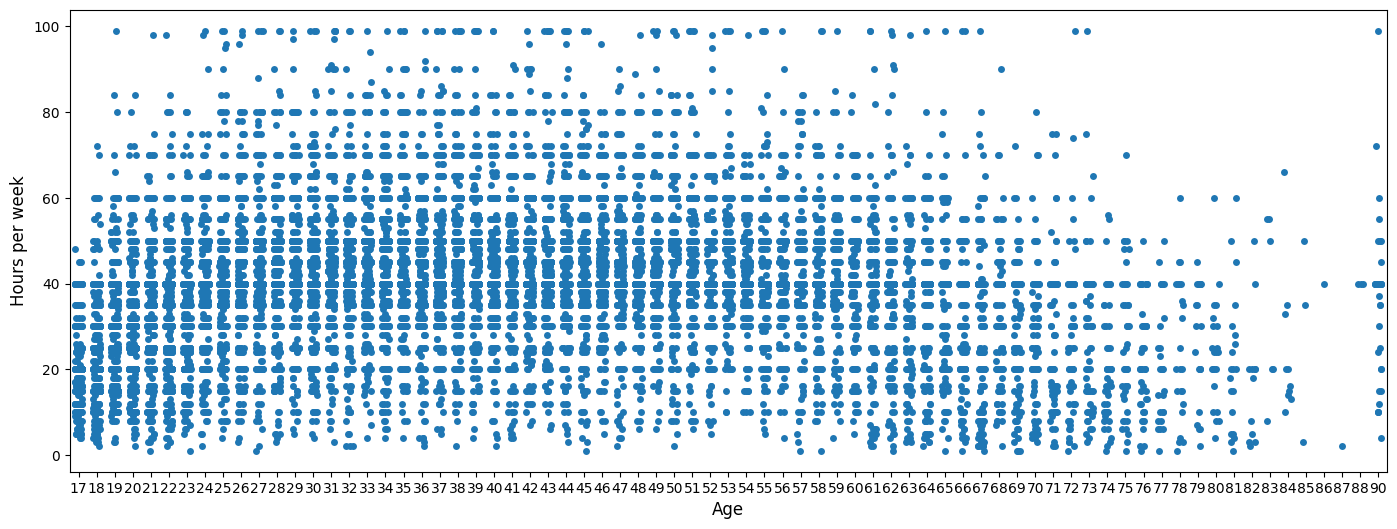

In [86]:
fig = plt.figure(figsize = (17,6))

sns.stripplot(x='age',y='hours.per.week', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

<a id='algo prepare'></a>

## Preparing Data for ML Algorithms

In [87]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [89]:
# drop rows with age 90
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [90]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [91]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,0.915493,0.0,1.000000,0.173469,0.081896
1,0.690141,0.0,1.000000,0.397959,0.118021
2,0.521127,0.0,0.895317,0.397959,0.086982


In [93]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names

    def fit(self,X,y = None):
        return self

    def transform(self,X):
        return X[self.attribute_names]


class num_trans(TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new
        return df



pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])



In [94]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

(32359, 5)

In [95]:
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [96]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols

    def fit(self,X,y = None):
        return self

    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)]
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

(32359, 80)

In [97]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [98]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")


Number of observations in final dataset: (32157, 86)


## Train and Fine Tuning on the model

In [99]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [100]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [102]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()


In [103]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [104]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [105]:
# train function fits the model and returns accuracy score
def train(algo, name, X_train, y_train, X_test, y_test):
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")

    # Vérifier si l'algorithme est un arbre de décision
    if isinstance(algo, DecisionTreeClassifier):
        # Importation en dehors de la condition if
        from sklearn.tree import export_graphviz
        import graphviz

        dot_data = export_graphviz(
            algo, out_file=None, feature_names=X.columns,
            class_names=["Low", "High"],  # Renommage des classes pour éviter les erreurs
            filled=True, rounded=True, special_characters=True
        )
        graph = graphviz.Source(dot_data)
        graph.render("data")  # Générer "data.pdf"

    return y_test, y_pred, score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))

def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores

accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 84.2786%
Null Accuracy: 76.5050%
Confusion Matrix
[[1043  846]
 [ 418 5733]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.2786%
Recall Score: 93.2044%
Specificity Score: 55.2144%
False Positive Rate: 44.7856%
Precision Score: 87.1409%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.71      0.55      0.62      1889
        True       0.87      0.93      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.79      0.74      0.76      8040
weighted avg       0.83      0.84      0.84      8040



<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 79.8010%


<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


Null Accuracy: 76.5050%
Confusion Matrix
[[1101  788]
 [ 836 5315]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 79.8010%
Recall Score: 86.4087%
Specificity Score: 58.2848%
False Positive Rate: 41.7152%
Precision Score: 87.0883%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.57      0.58      0.58      1889
        True       0.87      0.86      0.87      6151

    accuracy                           0.80      8040
   macro avg       0.72      0.72      0.72      8040
weighted avg       0.80      0.80      0.80      8040

--------------------------------------------KNN---------------------------------------------------
Accuracy Score for KNN: 81.0821%
Null Accuracy: 76.5050%
Confusion Matrix
[[ 939  950]
 [ 571 5580]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 81.0821

<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------SVC---------------------------------------------------
Accuracy Score for SVC: 84.0796%
Null Accuracy: 76.5050%
Confusion Matrix
[[ 993  896]
 [ 384 5767]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.0796%
Recall Score: 93.7571%
Specificity Score: 52.5675%
False Positive Rate: 47.4325%
Precision Score: 86.5526%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.72      0.53      0.61      1889
        True       0.87      0.94      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.79      0.73      0.75      8040
weighted avg       0.83      0.84      0.83      8040



<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------RandomForest---------------------------------------------------
Accuracy Score for RandomForest: 83.5572%
Null Accuracy: 76.5050%
Confusion Matrix
[[1056  833]
 [ 489 5662]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 83.5572%
Recall Score: 92.0501%
Specificity Score: 55.9026%
False Positive Rate: 44.0974%
Precision Score: 87.1747%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.68      0.56      0.62      1889
        True       0.87      0.92      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.78      0.74      0.76      8040
weighted avg       0.83      0.84      0.83      8040



<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------Adaboost---------------------------------------------------
Accuracy Score for Adaboost: 84.1542%
Null Accuracy: 76.5050%
Confusion Matrix
[[ 881 1008]
 [ 266 5885]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.1542%
Recall Score: 95.6755%
Specificity Score: 46.6384%
False Positive Rate: 53.3616%
Precision Score: 85.3765%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.77      0.47      0.58      1889
        True       0.85      0.96      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.81      0.71      0.74      8040
weighted avg       0.83      0.84      0.83      8040



<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------Bagging---------------------------------------------------
Accuracy Score for Bagging: 82.1517%
Null Accuracy: 76.5050%
Confusion Matrix
[[1132  757]
 [ 678 5473]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 82.1517%
Recall Score: 88.9774%
Specificity Score: 59.9259%
False Positive Rate: 40.0741%
Precision Score: 87.8491%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.63      0.60      0.61      1889
        True       0.88      0.89      0.88      6151

    accuracy                           0.82      8040
   macro avg       0.75      0.74      0.75      8040
weighted avg       0.82      0.82      0.82      8040



<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


--------------------------------------------Extratrees---------------------------------------------------
Accuracy Score for Extratrees: 82.3881%
Null Accuracy: 76.5050%
Confusion Matrix
[[1062  827]
 [ 589 5562]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 82.3881%
Recall Score: 90.4243%
Specificity Score: 56.2202%
False Positive Rate: 43.7798%
Precision Score: 87.0559%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.64      0.56      0.60      1889
        True       0.87      0.90      0.89      6151

    accuracy                           0.82      8040
   macro avg       0.76      0.73      0.74      8040
weighted avg       0.82      0.82      0.82      8040

--------------------------------------------Naive---------------------------------------------------
Accuracy Score for Naive: 30.5100%
Null Accuracy: 76

<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)
<ipython-input-105-2d5de39d8a94>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = y_test.value_counts()[0]/len(y_test)


In [106]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
LogisticRegression,0.842786
Adaboost,0.841542
SVC,0.840796
RandomForest,0.835572
Extratrees,0.823881
Bagging,0.821517
KNN,0.810821
DecisionTree,0.798010
Naive,0.305100


In [107]:
models_new = {clf_logreg:'LogisticRegression',
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

In [108]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:04.743182
Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:00:39.953017
Time taken to complete training Adaboost model: (hh:mm:ss.ms) 0:00:13.748052
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:00:18.200170


In [109]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
LogisticRegression,0.846125
Adaboost,0.842766
RandomForest,0.837708
Bagging,0.819671


In [110]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
param_grid_rf = {'n_estimators' : [50,60],
               'max_depth': range(5,16,2)}
param_grid_ada = {'n_estimators':[50,60,70]}
param_grid_bagging = {'n_estimators':[50,60,70]}


In [111]:
def feature_selection(model,X_train,y_train):
    rfe_model = RFE(model)
    rfe_model = rfe_model.fit(X_train,y_train)
    X_train_cols = list(X_train.columns[rfe_model.support_])
    X_train_new = X_train[X_train_cols]
    return X_train_new

def grid(model,parameters,X_train_new):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, return_train_score = False,
                        scoring = 'accuracy')
    grid.fit(X_train_new,y_train)
    return grid.best_score_, grid.best_estimator_

def main(model,X_train,y_train,parameters):
    X_train_modi = feature_selection(model,X_train,y_train)
    grid_best_score,grid_best_params = grid(model,parameters,X_train_modi)
    return grid_best_score,grid_best_params,X_train_modi


In [112]:
grid_best_score_logreg, grid_best_params_logreg , X_train_modi_logreg = main(clf_logreg,X_train,y_train,param_grid_logreg)
grid_best_score_rf, grid_best_params_rf , X_train_modi_rf = main(clf_forest,X_train,y_train,param_grid_rf)
grid_best_score_ab, grid_best_params_ab , X_train_modi_ab = main(clf_ada,X_train,y_train,param_grid_ada)
grid_best_score_bc, grid_best_params_bc , X_train_modi_bc = main(clf_ada,X_train,y_train,param_grid_bagging)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

In [113]:
pd.DataFrame([grid_best_score_logreg, grid_best_score_rf,grid_best_score_ab,grid_best_score_bc],
             index = ['LogisticRegression','RandomForest','AdaBoost','Bagging'],
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score',ascending  = False)

,Accuracy Score
RandomForest,0.852676
AdaBoost,0.844756
Bagging,0.844756
LogisticRegression,0.844342


In [114]:
print("Number of estimators:",grid_best_params_ab.get_params()['n_estimators'])

Number of estimators: 70
